<a href="https://colab.research.google.com/github/M-Matz/MBA-IBMEC-series-temporais/blob/main/Exercicio_Aula_ao_vivo_02_Series_Temporais_yFinance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio preparatorio para Aula#3 - Series Temporais

Instalando bibliotecas necessarias - Plotly, yFinance - Yahoo Finance API, e PMDARIMA

In [1]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 770 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
#pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 22.4 MB/s 
     |████████████████████████████████| 9.9 MB 50.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


# Acrescente a aplicação do modelo ARIMA e do método RMSE para o código a seguir.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot


In [80]:
df = yf.download('PETR4.SA', start = '2019-11-01', end= '2020-06-01', groupby="ticker")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,30.590000,31.230000,29.840000,30.430000,16.185854,101210200
2019-11-04,30.889999,31.219999,29.959999,30.360001,16.148619,81023400
2019-11-05,30.410000,30.600000,29.580000,29.650000,15.770970,92980900
2019-11-06,30.049999,30.700001,28.100000,29.709999,15.802882,154003100
2019-11-07,30.000000,31.070000,29.540001,30.900000,16.435850,96329000


Utilizacao do pacote Seaborn para exibicao de graficos 


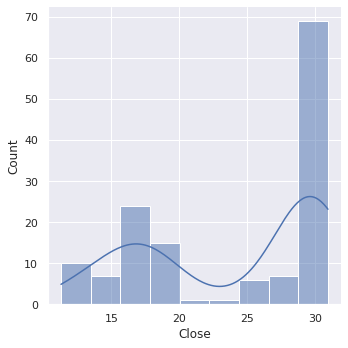

In [6]:
sns.set_theme(style="darkgrid")

sns.displot(df['Close'].dropna(), kde=True)

In [7]:
import plotly.offline as py
import plotly.graph_objs as go
dados = [go.Scatter(x=df.index, y=df['Close'])]
layout = go.Layout(title= 'Historico do Preço da Ação PETR4.SA',
                   yaxis = {'title': 'Preços'},
                   xaxis = {'title': 'Período'})
fig = go.Figure(data=dados, layout= layout)
py.iplot(fig)

Implantação de Modelo ARIMA para predição do valor das ações da PETR4
no dataframe df criado a partir da recuperação dos dados de valor das ações da PETR4 pela API yFinance 'PETR4.SA', start = '2019-11-01', end= '2020-06-01'

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



Pratica com Metodo ARMA


In [81]:
df_mod = df.drop(['Open','High','Low','Adj Close','Volume'], axis=1)


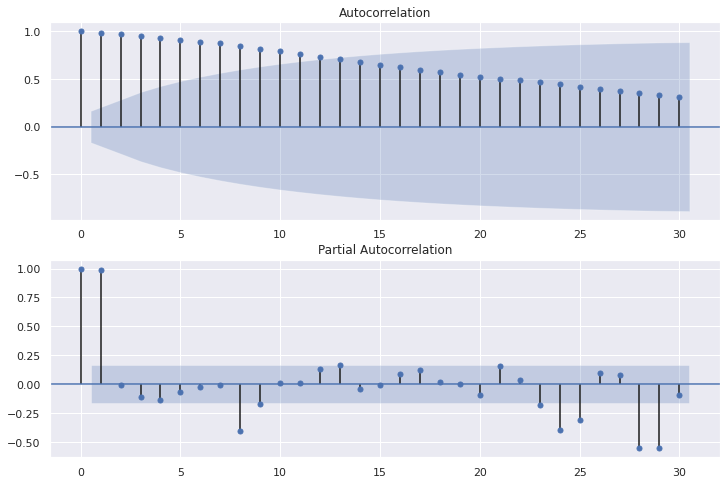

In [9]:
qtde_defasagens = 30

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_mod.values.squeeze(),lags=qtde_defasagens, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_mod,lags=qtde_defasagens,ax=ax2)

In [14]:
df_mod.tail()

,Close
Date,
2020-05-25,19.48
2020-05-26,19.67
2020-05-27,19.93
2020-05-28,19.77
2020-05-29,20.34


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



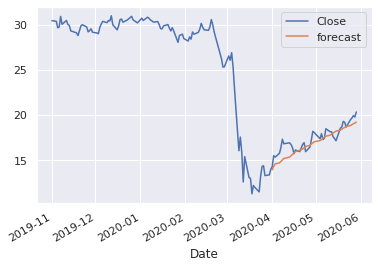

In [27]:
p = 1
q = 4
res = sm.tsa.ARMA(df_mod,(p,q)).fit()
fig, ax = plt.subplots()
ax = df_mod.loc['2019-11-01':].plot(ax=ax)
fig= res.plot_predict('2020-04-01','2020-05-29',dynamic = True, ax=ax, plot_insample=False)
plt.show()

Estimando valores de P e D usando PDMARIMA


In [21]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 11.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [82]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_mod['Close'],
                          trace=True,
                          suppress_warnings=True, m=2, seasonal=True
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[2] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[2] intercept   : AIC=484.993, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[2] intercept   : AIC=427.452, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[2] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[2]             : AIC=484.605, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[2] intercept   : AIC=439.117, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[2] intercept   : AIC=420.459, Time=0.16 sec
 ARIMA(1,0,0)(2,1,1)[2] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(1,1,1)[2] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(2,1,0)[2] intercept   : AIC=486.477, Time=0.08 sec
 ARIMA(1,0,1)(2,1,0)[2] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,1)(2,1,0)[2] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[2]             : AIC=418.838, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[2]             : AIC=425.862, Time=0.06 sec
 ARIMA(1,0,0)(2,1,1)[2]             : AIC=inf, Time=0.60 sec
 ARIMA(1,0

In [83]:
modelo = ARIMA(df_mod['Close'],
               order=(2,1,0))
modelo_fit = modelo.fit()
print(modelo_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  139
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -194.467
Method:                       css-mle   S.D. of innovations              0.980
Date:                Sun, 06 Nov 2022   AIC                            396.933
Time:                        18:23:44   BIC                            408.671
Sample:                             1   HQIC                           401.703
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0728      0.091     -0.802      0.423      -0.251       0.105
ar.L1.D.Close    -0.0204      0.084     -0.243      0.808      -0.185       0.144
ar.L2.D.Close     0.1053      0.084     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [84]:
modelo_fit.predict()

Date
2019-11-04   -0.072759
2019-11-05   -0.072822
2019-11-06   -0.059449
2019-11-07   -0.142565
2019-11-08   -0.084580
                ...   
2020-05-25   -0.067542
2020-05-26   -0.137883
2020-05-27    0.014816
2020-05-28   -0.051892
2020-05-29   -0.035941
Length: 139, dtype: float64

139


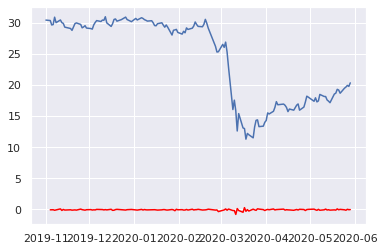

In [85]:
inicio = 1
fim = len(df_mod)-1
print(fim)
predicoes= modelo_fit.predict(
    start = 1, 
    end = fim).rename('Predicoes ARIMA')
plt.plot(df_mod)
plt.plot(predicoes, color='red')

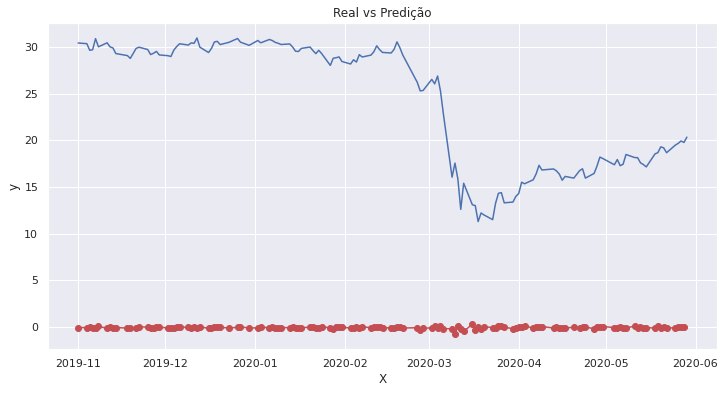

In [86]:
plt.figure(figsize=(12,6))
periodo = df_mod.index
periodo = periodo[:-1]
plt.plot(df_mod.index,df_mod['Close'])
plt.plot(periodo,predicoes, 'ro-')
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [88]:
#periodo = periodo[:-1]
df_mod = df_mod[:-1]

# Controle de Qualidade

##MAE

In [89]:
print('MAE: ', metrics.mean_absolute_error(df_mod['Close'], predicoes) )

MAE:  24.165588953788657


## MSE

In [90]:
print('MSE: ', metrics.mean_squared_error(df_mod['Close'], predicoes))

MSE:  628.2526405920512


RMSE

In [91]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(df_mod['Close'], predicoes)))

RMSE:  25.064968393996654
